<a href="https://colab.research.google.com/github/hellen2021/Football-Analysis-Mchezopesa-Limited/blob/main/Supervised_Learning_Regression_week1_IP_Core_Module2_15_04_2022_Hellen_Cheptoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis

### Football Analysis for Mchezopesa Limited Company

## 1.Defining the Research Questions

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## 2.Defining the metric of success
This project will be a success if:

a) We are able to accurately predict the winning team based on the two conditions:
*   Home team or away team
*   Type of tournament

b) Achieve an accuracy of atleast 80%

c) have the lowest RMSE as possible

## 3.Understanding the context

## 4.Experimental Design
The following are the design steps:
*   Loading the datsets
*   Exploring and cleaning the datasets
*   Merge the two datasets
*   Perform EDA
*   Feature Engineering
*   Check for multicollinearity
*   Polynomial Regression
*   Logistic Regression
*   Compute the Root Mean Squared Error
*   Create residual plots for the models, and assess their heteroscedasticity using Bartlett’s test

## 4.Data Relevance
The relevance of the data will be verified by the performance of the model



## Importing necessary libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.feature_extraction import DictVectorizer
import scipy as sp

from matplotlib.figure import Figure
import os
import warnings
import datetime

## Load the data

In [91]:
# Mounting Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
# Accessing the working directory
os.chdir('/content/drive/MyDrive/Moringa Data Science/CORE MODULE 2/week1IP')

In [93]:
# Loading dataset
results = pd.read_csv('results.csv')
fifa_ranking = pd.read_csv('fifa_ranking.csv')

## Datasets Preview

In [94]:
# results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [95]:
# fifa ranking dataset
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


## Explore and clean the datasets

In [96]:
print('results dataset has',results.shape[0], 'rows and', results.shape[1], 'columns')
print('fifa ranking dataset has',fifa_ranking.shape[0], 'rows and', fifa_ranking.shape[1], 'columns')

results dataset has 40839 rows and 9 columns
fifa ranking dataset has 57793 rows and 16 columns


In [97]:
# shaping the column names
results.columns = results.columns.str.lower().str.strip().str.replace(' ', '_')
fifa_ranking.columns = fifa_ranking.columns.str.lower().str.strip().str.replace(' ', '_')

In [98]:
#renaming columns
fifa_ranking.rename(columns = {'country_full':'country'}, inplace = True)

In [99]:
# drop unnecessary columns
fifa_ranking.drop(columns = ['country_abrv', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
                  'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg', 'three_year_ago_weighted','confederation', 'rank_change'], axis = 1, inplace = True)
results.drop(columns = ['city', 'neutral'], axis = 1, inplace = True)

In [100]:
fifa_ranking.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'rank_date'], dtype='object')

In [101]:
# statistical analysis
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [102]:
# statistical analysis
fifa_ranking.describe()

,rank,total_points,previous_points
count,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926
std,58.618424,260.426863,302.872948
min,1.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000
50%,101.000000,0.000000,272.000000
75%,152.000000,92.790000,525.000000
max,209.000000,1775.030000,1920.000000


In [103]:
# info
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   country     40839 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


date column data type should be changed to date time

In [104]:
# info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             57793 non-null  int64  
 1   country          57793 non-null  object 
 2   total_points     57793 non-null  float64
 3   previous_points  57793 non-null  int64  
 4   rank_date        57793 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.2+ MB


In [105]:
print(results['date'].unique())
print('****************************************************************')
print(fifa_ranking['rank_date'].unique())

['1872-11-30' '1873-03-08' '1874-03-07' ... '2019-07-18' '2019-07-19'
 '2019-07-20']
****************************************************************
['1993-08-08' '1993-09-23' '1993-10-22' '1993-11-19' '1993-12-23'
 '1994-02-15' '1994-03-15' '1994-04-19' '1994-05-17' '1994-06-14'
 '1994-07-21' '1994-09-13' '1994-10-25' '1994-11-22' '1994-12-20'
 '1995-02-20' '1995-04-19' '1995-05-16' '1995-06-13' '1995-07-25'
 '1995-08-22' '1995-09-19' '1995-10-17' '1995-11-21' '1995-12-19'
 '1996-01-24' '1996-02-21' '1996-04-24' '1996-05-22' '1996-07-03'
 '1996-08-28' '1996-09-25' '1996-10-23' '1996-11-20' '1996-12-18'
 '1997-02-27' '1997-04-09' '1997-05-14' '1997-06-18' '1997-07-16'
 '1997-08-20' '1997-09-17' '1997-10-17' '1997-11-19' '1997-12-23'
 '1998-02-18' '1998-03-18' '1998-04-22' '1998-05-20' '1998-07-15'
 '1998-08-19' '1998-09-16' '1998-10-21' '1998-11-18' '1998-12-23'
 '1999-01-27' '1999-02-24' '1999-03-24' '1999-04-21' '1999-05-19'
 '1999-06-16' '1999-07-21' '1999-08-18' '1999-09-15' '1999

rankings started from 1993, therefore we should drop columns before 1993 from the results datset

In [106]:
results.shape

(40839, 7)

In [107]:
# drop the records before 1993
results = results[results['date'] >= '1993']
results.shape


(23478, 7)

Now the rows have reduced from 40839 to 23478

In [108]:
# missing values
results.isnull().sum()

# no missing values

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
country       0
dtype: int64

In [109]:
# missing values
fifa_ranking.isnull().sum()

# there are no missing values

rank               0
country            0
total_points       0
previous_points    0
rank_date          0
dtype: int64

In [110]:
# duplicate values
value = results.duplicated().sum()
print(value)
print('results dataset has', value, 'duplicate values')
# results dataset has no duplicate values

1
results dataset has 1 duplicate values


In [111]:
# duplicate values
value = fifa_ranking.duplicated().sum()
print(value)
print('results dataset has', value, 'duplicate values')

37
results dataset has 37 duplicate values


In [112]:
# drop the duplicate values
fifa_ranking.drop_duplicates(keep='first', inplace = True)

In [113]:
# first, change the date columns to datetime
results['date'] = pd.to_datetime(results['date'])

# rename the rank_date column
fifa_ranking.rename(columns = {'rank_date':'date'}, inplace = True)
fifa_ranking['date'] = pd.to_datetime(fifa_ranking['date'])   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
# split the date to months and year
# results
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

# fifa rankings
fifa_ranking['year'] = fifa_ranking.date.dt.year
fifa_ranking['month'] = fifa_ranking.date.dt.month


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [115]:
fifa_ranking.columns

Index(['rank', 'country', 'total_points', 'previous_points', 'date', 'year',
       'month'],
      dtype='object')

### Check for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


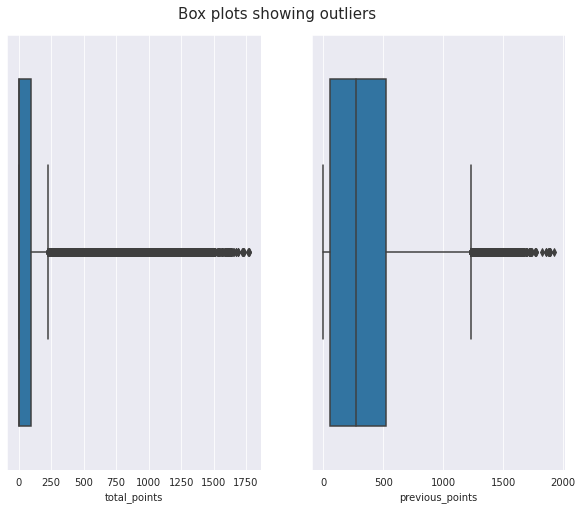

In [122]:
# Checking for Outliers
#
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 8))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), fifa_ranking, ['total_points',	'previous_points']):
  sns.boxplot(fifa_ranking[name], ax = ax)

plt.show()

There are many outliers but we cannot impute them since they are true values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


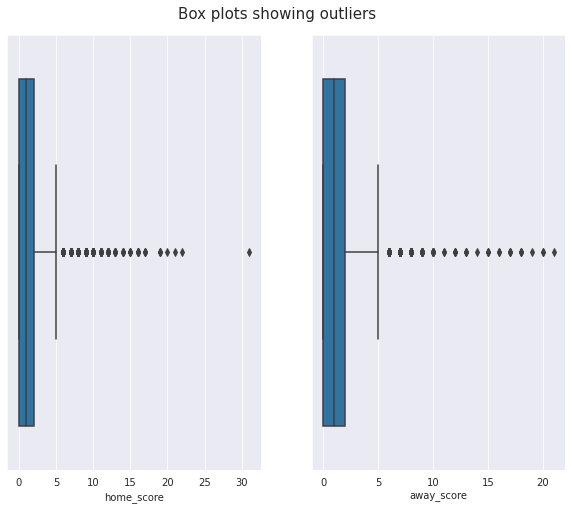

In [124]:
# Checking for Outliers
#
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 8))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), results, ['home_score',	'away_score']):
  sns.boxplot(results[name], ax = ax)


There are many outliers but we cannot impute them since they are true values

## Merging the two datasets to obtain Home_team ranking(home_team_rank)

In [26]:
# merge to obtain the home_team

home_football = pd.merge(results, fifa_ranking, how = 'inner', left_on = ['year', 'month', 'home_team'], right_on = ['year', 'month', 'country'])

In [27]:
# preview the new dataframe
pd.set_option('display.max_columns', None)
home_football.head()

,date_x,home_team,away_team,home_score,away_score,tournament,country_x,year,month,rank,country_y,total_points,previous_points,date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,1993-08-08
2,1993-08-29,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,1993,8,19,Colombia,0.0,36,1993-08-08
3,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,1993,8,70,Peru,0.0,16,1993-08-08
4,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Peru,1993,8,70,Peru,0.0,16,1993-08-08


In [28]:
# drop nnecessary column
home_football.drop(columns = ['country_y', 'date_x', 'date_y'], axis = 1, inplace=True)

In [29]:
# rename some columns
home_football.rename(columns = {'country_x':'country', 'rank':'home_rank'}, inplace=True)

In [30]:
home_football.head(3)

,home_team,away_team,home_score,away_score,tournament,country,year,month,home_rank,total_points,previous_points
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,1993,8,19,0.0,36
1,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,1993,8,19,0.0,36
2,Colombia,Peru,4,0,FIFA World Cup qualification,Colombia,1993,8,19,0.0,36


note that the home team is similar to country column

## Merging the two datasets to obtain an away team ranking(away_team_rank)

In [31]:
# merge to obtain the home_team

away_football = pd.merge(results, fifa_ranking, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'country'])
away_football.head()

,date_x,home_team,away_team,home_score,away_score,tournament,country_x,year,month,rank,country_y,total_points,previous_points,date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Colombia,1993,8,67,Paraguay,0.0,22,1993-08-08
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,1993,8,67,Paraguay,0.0,22,1993-08-08
2,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,1993,8,5,Argentina,0.0,51,1993-08-08
3,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,1993,8,5,Argentina,0.0,51,1993-08-08
4,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,1993,8,5,Argentina,0.0,51,1993-08-08


In [32]:
# drop nnecessary column
away_football.drop(columns = ['country_y', 'date_x', 'date_y'], axis = 1, inplace=True)

In [33]:
# rename some columns
away_football.rename(columns = {'country_x':'country', 'rank':'away_rank'}, inplace=True)

In [34]:
away_football = away_football[['away_rank','away_team', 'month', 'year']]
away_football.head()

,away_rank,away_team,month,year
0,67,Paraguay,8,1993
1,67,Paraguay,8,1993
2,5,Argentina,8,1993
3,5,Argentina,8,1993
4,5,Argentina,8,1993


## Merge the datasets to obtain home team rankings and away team rankings

In [35]:
# merge 
football = pd.merge(home_football, away_football, how = 'inner', left_on = ['year','month','away_team'], right_on = ['year','month','away_team'])
football.sample(10)

,home_team,away_team,home_score,away_score,tournament,country,year,month,home_rank,total_points,previous_points,away_rank
12687,Mexico,Poland,1,1,Friendly,United States,2005,4,8,0.00,752,25
11794,Brazil,Chile,1,0,Copa América,Peru,2004,7,1,0.00,842,66
7290,Luxembourg,Finland,0,1,Friendly,Luxembourg,2001,2,141,0.00,266,60
17782,India,Sri Lanka,3,1,Nehru Cup,India,2009,8,156,0.00,148,156
20670,Rwanda,Nigeria,0,0,African Cup of Nations qualification,Rwanda,2012,2,108,308.46,304,56
16438,Rwanda,Morocco,3,1,FIFA World Cup qualification,Rwanda,2008,6,106,0.00,289,40
1502,Morocco,Mali,2,0,Friendly,Morocco,1995,11,37,0.00,42,52
17361,Nepal,Palestine,0,0,AFC Challenge Cup qualification,Nepal,2009,3,172,0.00,70,174
27493,Iceland,Ukraine,2,0,FIFA World Cup qualification,Iceland,2017,9,22,931.49,927,24
5274,Iraq,Oman,2,0,AFC Asian Cup qualification,Tajikistan,1999,8,108,0.00,349,87


## Exploratory Data Analysis

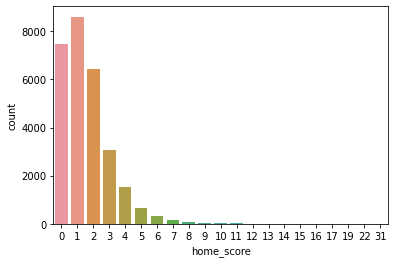

In [36]:
Figure(figsize=(10,8))
sns.countplot(x = 'home_score', data= football)
plt.show()

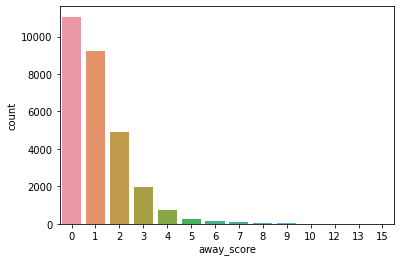

In [37]:
sns.countplot(x = 'away_score', data= football)
plt.show()

Both home scores and away scores ranges between 0 and 9, with frequent scores being 0, 1,2

### Feature Engineering

In [38]:
# tournament
football['tournament'].nunique()

65

There are 65 tournaments, but we want to group them to 3, namely: Fifa worldcup, friendly and other

In [39]:
# grouping the tournament
def tournament(tournament):
  if tournament == 'FIFA World Cup qualification':
    return 'FIFA World Cup'
  elif tournament == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

# apply
football['tournament_type'] = football['tournament'].apply(lambda t: tournament(t))

In [41]:
# drop the original tournament column, to remain with the new column tournament type
football.drop(columns = ['tournament'], axis = 1, inplace = True)

We now have three types of tournaments

In [42]:
# goal difference column
football['goal_difference'] = football['home_score'] - football['away_score']
football.sample(5)

,home_team,away_team,home_score,away_score,country,year,month,home_rank,total_points,previous_points,away_rank,tournament_type,goal_difference
13180,Italy,Moldova,2,1,Italy,2005,10,12,0.0,725,108,FIFA World Cup,1
13574,Algeria,Burkina Faso,0,0,France,2006,2,81,0.0,522,87,Friendly,0
12658,Cameroon,Sudan,2,1,Cameroon,2005,3,25,0.0,675,107,FIFA World Cup,1
17401,Russia,Azerbaijan,2,0,Russia,2009,3,8,0.0,1119,134,FIFA World Cup,2
6821,Mexico,Ecuador,2,0,United States,2000,9,13,0.0,688,60,Friendly,2


In [43]:
# column that determines if the match ended with a win, draw or lose
def home_team(scores):
  if scores == 0:
    return 'Draw'
  elif scores > 0:
    return 'Win'
  else:
    return 'Lose'

football['match_outcome'] = football['goal_difference'].apply(lambda d: home_team(d))

In [44]:
football.sample(3)

,home_team,away_team,home_score,away_score,country,year,month,home_rank,total_points,previous_points,away_rank,tournament_type,goal_difference,match_outcome
442,Chile,Argentina,3,3,Chile,1994,5,40,0.0,34,6,Friendly,0,Draw
6194,Italy,Portugal,2,0,Italy,2000,4,14,0.0,681,15,Friendly,2,Win
14640,Italy,Scotland,2,0,Italy,2007,3,2,0.0,1562,16,Other,2,Win


## Multicollinearity

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

This means that an independent variable can be predicted from another independent variable in a regression model.

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. 

## Detecting multicollinearity using pearsonn's correlation

In [45]:
# pearsonn's square to draw collinearity between variables
correlations = football.corr()
correlations

,home_score,away_score,year,month,home_rank,total_points,previous_points,away_rank,goal_difference
home_score,1.000000,-0.161033,-0.052214,0.020218,-0.114510,0.012154,0.069234,0.307728,0.824708
away_score,-0.161033,1.000000,-0.012372,0.019419,0.221365,-0.061949,-0.130760,-0.151487,-0.690983
year,-0.052214,-0.012372,1.000000,-0.008268,0.091889,0.624147,0.408979,0.091281,-0.031154
month,0.020218,0.019419,-0.008268,1.000000,0.067434,0.011014,-0.068743,0.068120,0.003681
home_rank,-0.114510,0.221365,0.091889,0.067434,1.000000,-0.299439,-0.652942,0.515308,-0.210721
total_points,0.012154,-0.061949,0.624147,0.011014,-0.299439,1.000000,0.546987,-0.147924,0.044401
previous_points,0.069234,-0.130760,0.408979,-0.068743,-0.652942,0.546987,1.000000,-0.310923,0.125640
away_rank,0.307728,-0.151487,0.091281,0.068120,0.515308,-0.147924,-0.310923,1.000000,0.312198
goal_difference,0.824708,-0.690983,-0.031154,0.003681,-0.210721,0.044401,0.125640,0.312198,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


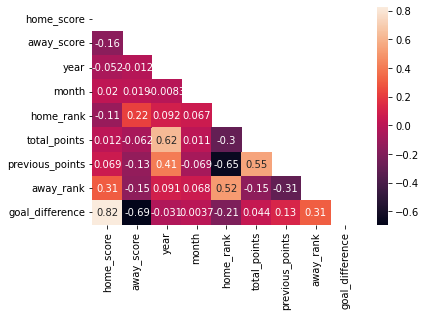

In [46]:
# visualize the correlations
Figure(figsize = (12, 10))

mask = np.zeros_like(football.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(football.corr(), annot =True, mask = mask)
plt.show()

## Detecting multicollinearity using Variance Inflation Factor(VIF) score
VIF score of an independent variable represents how well the variable is explained by other independent variables

*  VIF = 1, no correlation between the independent variable and the other variables
*  VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

## Fixing multicollinearity
Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:





In [47]:
# vif
vif_df = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
vif_df

,home_score,away_score,year,month,home_rank,total_points,previous_points,away_rank,goal_difference
home_score,-4.646106e+13,3.635009e+13,0.059194,-0.002003,0.295168,-0.004037,-0.133113,-0.704965,6.343410e+13
away_score,3.635009e+13,-2.843948e+13,0.140343,-0.027672,-0.462250,-0.060058,-0.026658,0.480574,-4.962941e+13
year,5.991796e-02,1.397771e-01,2.424536,0.045670,-1.329363,-1.271809,-1.196323,-0.124215,8.796539e-02
month,-1.958531e-03,-2.770693e-02,0.045670,1.011910,-0.027877,-0.092549,0.065602,-0.051307,-1.382091e-02
home_rank,2.947634e-01,-4.619334e-01,-1.329363,-0.027877,3.304436,0.547221,1.955056,-1.103669,1.673526e-01
total_points,-5.135398e-03,-5.919838e-02,-1.271809,-0.092549,0.547221,2.111535,-0.261046,0.078607,-4.613817e-02
previous_points,-1.331129e-01,-2.665775e-02,-1.196323,0.065602,1.955056,-0.261046,2.888071,-0.046768,1.291545e-01
away_rank,-7.049645e-01,4.805740e-01,-0.124215,-0.051307,-1.103669,0.078607,-0.046768,1.837295,1.059978e-01
goal_difference,6.343410e+13,-4.962941e+13,0.088954,-0.013760,0.166801,-0.047638,0.129155,0.105998,-8.660769e+13


For our dataset, there were no predictor variables which were highly correlated, so we are good to go 


In [48]:
# save the df to csv
football_df = football[['home_team', 'away_team', 'home_score', 'away_score', 'tournament_type', 'home_rank', 'away_rank', 'match_outcome']]

football_df.to_csv('final_fifa_rankings.csv')

In [49]:
# read the new dataset
football_df = pd.read_csv('final_fifa_rankings.csv')
football_df.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
0,0,Colombia,Paraguay,0,0,FIFA World Cup,19,67,Draw
1,1,Colombia,Paraguay,0,0,FIFA World Cup,19,67,Draw
2,2,Argentina,Paraguay,0,0,FIFA World Cup,5,67,Draw
3,3,Argentina,Paraguay,0,0,FIFA World Cup,5,67,Draw
4,4,Colombia,Argentina,2,1,FIFA World Cup,19,5,Win


In [50]:
# drop unnamed column
football_df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [51]:
# bottom of dataset
football_df.tail()

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
28434,Japan,Poland,0,1,Other,61,8,Lose
28435,Argentina,Iceland,1,1,Other,5,22,Draw
28436,Argentina,Iceland,1,1,Other,5,22,Draw
28437,Nigeria,Iceland,2,0,Other,48,22,Win
28438,Nigeria,Iceland,2,0,Other,48,22,Win


In [52]:
football_df.describe()

,home_score,away_score,home_rank,away_rank
count,28439.000000,28439.000000,28439.000000,28439.000000
mean,1.596821,1.101445,78.387813,81.409192
std,1.635258,1.279389,51.097232,52.575171
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,35.000000,38.000000
50%,1.000000,1.000000,73.000000,76.000000
75%,2.000000,2.000000,114.000000,119.000000
max,31.000000,15.000000,209.000000,209.000000


## Modelling

### Approach 1:Polynomial Regression

### Model 1: Predicting home score using polynomial regression

In [53]:
# separate the predictors from the target variable
predictor = football_df[['tournament_type', 'home_rank', 'away_rank']]
target = football_df['home_score'].values.reshape(-1,1)

# predictor = football_df.iloc[:,[4, 5, 6]].values
# target = football_df.iloc[:, 2].values

In [54]:
predictor.head()

,tournament_type,home_rank,away_rank
0,FIFA World Cup,19,67
1,FIFA World Cup,19,67
2,FIFA World Cup,5,67
3,FIFA World Cup,5,67
4,FIFA World Cup,19,5


In [55]:
# Encoding the categorical variable using dictvectorizer
# turn df into dict
football_df_dict = predictor.to_dict(orient='records') # turn each row as key-value pairs


# instantiate a Dictvectorizer object for X
dv_football = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix

# apply dv_football on football_df_dict
football_encoded = dv_football.fit_transform(football_df_dict)


In [56]:
# convert the encoded array into a dataframe
football_enc = pd.DataFrame(football_encoded)
football_enc.head()

,0,1,2,3,4
0,67.0,19.0,1.0,0.0,0.0
1,67.0,19.0,1.0,0.0,0.0
2,67.0,5.0,1.0,0.0,0.0
3,67.0,5.0,1.0,0.0,0.0
4,5.0,19.0,1.0,0.0,0.0


In [57]:
# vocabulary
vocab = dv_football.vocabulary_
vocab

{'away_rank': 0,
 'home_rank': 1,
 'tournament_type=FIFA World Cup': 2,
 'tournament_type=Friendly': 3,
 'tournament_type=Other': 4}

In [58]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(football_enc, target, test_size = 0.2, random_state=12)

If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 12 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [59]:
# standardising the x_train and x_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
# Fit polynomial Regression to the dataset
poly_features = PolynomialFeatures(degree = 10) 
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)


In [61]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

making predictions

In [62]:
# Predict using Polynomial Regression
# We can also get the predictions as an array
y_pred = regressor.predict(X_test)


In [63]:
y_pred

array([[3.32242584],
       [1.26889372],
       [2.79908752],
       ...,
       [0.98566246],
       [1.39756203],
       [0.91651917]])

## Evaluate the performance of model 1

In [64]:
# Measuring the accuracy of the model

print("The RMSE score for the model % .3f: "% np.sqrt(mean_squared_error(Y_test, y_pred)))

The RMSE score for the model  1.388: 


### Challenging the solution
By increasing the degree of freedom, the value of RMSE was decreasing until the degree of 11 when the RMSE started increasing again. So the best degree of freeddom was at degree 10

### Residual Plots and Heteroscedasticity testing using Bartlett's test

In [65]:
# residuals
residuals = np.subtract(y_pred, Y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print(residuals.mean())


                 0
count  5688.000000
mean      0.065600
std       1.386771
min     -16.411642
25%      -0.649190
50%       0.274155
75%       0.975707
max       7.074686
0.06560019945461204


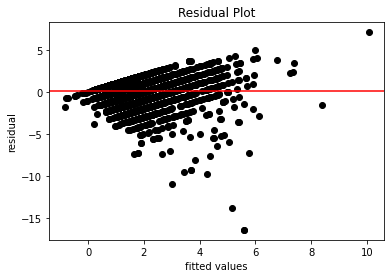

In [66]:
# Plotting the prediction errors
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

In [67]:
# bartlett's test

# first change the 2d array samples to 1d
y_pred_flat = y_pred.ravel()
residuals_flat = residuals.ravel()

test_result, p_value = sp.stats.bartlett(y_pred_flat, residuals_flat)
print('test_result=',test_result,\
      'p-value=',p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_flat)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('critical_value',critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


test_result= 1269.2374271619533 p-value= 5.4754738281295145e-278
critical_value inf
the variances are homogeneous!


### Model 2: Predicting away score using polynomial regression

In [68]:
# separate the predictors from the target variable
predictor = football_df[['tournament_type', 'home_rank', 'away_rank']]
target = football_df['away_score'].values.reshape(-1,1)


In [69]:
predictor.head()

,tournament_type,home_rank,away_rank
0,FIFA World Cup,19,67
1,FIFA World Cup,19,67
2,FIFA World Cup,5,67
3,FIFA World Cup,5,67
4,FIFA World Cup,19,5


the predictor variables are similar to the one used above(for predicting home score)

so we will use the same encoded variables used above, named football_enc

In [70]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(football_enc, target, test_size = 0.2, random_state=12)

In [71]:
# standardising the x_train and x_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
# Fit polynomial Regression to the dataset
poly_features = PolynomialFeatures(degree = 6) 
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)


In [73]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [74]:
# Predict using Polynomial Regression
# We can also get the predictions as an array
y_pred = regressor.predict(X_test)

In [75]:
# Measuring the accuracy of the model

print("The RMSE score for the model %.3f : " % np.sqrt(mean_squared_error(Y_test, y_pred)))

The RMSE score for the model 1.157 : 


### Challenging the solution
By increasing the degree of freedom, the value of RMSE was decreasing until the degree of 7 when the RMSE started increasing again. So the best degree of freeddom was at degree 6

However, the value of RMSE is too high and not the best to use

### Residual Plots and Heteroscedasticity testing using Bartlett's test

 Quiz: Figure out from the home team’s perspective if the game is a Win, Lose or Draw

In [76]:
# residuals
residuals = np.subtract(y_pred, Y_test)

# Let's describe our residual:
print(pd.DataFrame(residuals).describe())

print(residuals.mean())


                 0
count  5688.000000
mean     -0.022330
std       1.156969
min      -9.348633
25%      -0.539368
50%       0.164490
75%       0.783630
max       3.849854
-0.022330325699389066


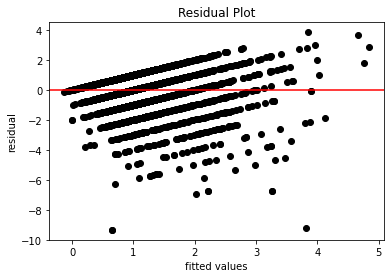

In [77]:
# Plotting the prediction errors
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

In [78]:
# bartlett's test

# first change the 2d array samples to 1d
y_pred_flat = y_pred.ravel()
residuals_flat = residuals.ravel()

test_result, p_value = sp.stats.bartlett(y_pred_flat, residuals_flat)
print('test_result=',test_result,\
      'p-value=',p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_flat)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('critical_value',critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

test_result= 2994.3652695038536 p-value= 0.0
critical_value inf
the variances are homogeneous!


### Approach 2: Using Logistic Regression

In [79]:
# preview the dataset
football_df.head()

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
0,Colombia,Paraguay,0,0,FIFA World Cup,19,67,Draw
1,Colombia,Paraguay,0,0,FIFA World Cup,19,67,Draw
2,Argentina,Paraguay,0,0,FIFA World Cup,5,67,Draw
3,Argentina,Paraguay,0,0,FIFA World Cup,5,67,Draw
4,Colombia,Argentina,2,1,FIFA World Cup,19,5,Win


In [80]:
# Splitting our dataset
X = football_df[['home_score', 'away_score', 'tournament_type', 'home_rank', 'away_rank']]
y = football_df['match_outcome']


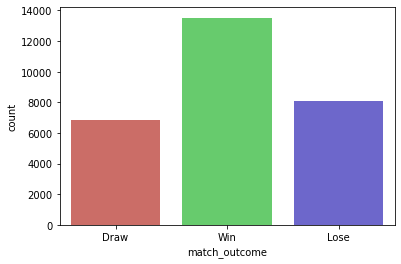

In [81]:
# Checking our target variable
sns.countplot(x='match_outcome',data=football_df, palette='hls')

This is an ordinal Logistic Regression

In [82]:
# Encoding the categorical variable using dictvectorizer
# turn df into dict
X_dict = X.to_dict(orient='records') # turn each row as key-value pairs


# instantiate a Dictvectorizer object for X
dv_X = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix

# apply dv_football on football_df_dict
X_encoded = dv_X.fit_transform(X_dict)


In [83]:
# convert the encoded array into a dataframe
X = pd.DataFrame(X_encoded)
X.head()

,0,1,2,3,4,5,6
0,67.0,0.0,19.0,0.0,1.0,0.0,0.0
1,67.0,0.0,19.0,0.0,1.0,0.0,0.0
2,67.0,0.0,5.0,0.0,1.0,0.0,0.0
3,67.0,0.0,5.0,0.0,1.0,0.0,0.0
4,5.0,1.0,19.0,2.0,1.0,0.0,0.0


In [84]:
# vocabulary
vocab = dv_X.vocabulary_
vocab

{'away_rank': 0,
 'away_score': 1,
 'home_rank': 2,
 'home_score': 3,
 'tournament_type=FIFA World Cup': 4,
 'tournament_type=Friendly': 5,
 'tournament_type=Other': 6}

In [85]:
# plit to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

In [86]:
 #Fitting our model
# 
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [87]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [88]:
# Evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
print(confusion_matrix)

print("The accuracy of the model is:", accuracy_score(y_test, y_pred))


The confusion matrix:
[[1398    0    0]
 [   0 1555    0]
 [   0    0 2735]]
The accuracy of the model is: 1.0


THe accuracy is too high(100%) on our firt model trial and this could be a sign of overfitting.

We can challenge the solution by hyperparameter tuning, using different classifiers like the SVM

### Challenging the solution

Let's try hyperparameter tuning

In [125]:
football_df.head(2)

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
0,Colombia,Paraguay,0,0,FIFA World Cup,19,67,Draw
1,Colombia,Paraguay,0,0,FIFA World Cup,19,67,Draw


In [129]:
# separate predictors from the target variable
predictors = football_df[['home_score', 'away_score', 'tournament_type', 'home_rank', 'away_rank']]
target = football_df['match_outcome']

In [131]:
# Encoding the categorical variable using dictvectorizer
# turn df into dict
football_df_dict = predictor.to_dict(orient='records') # turn each row as key-value pairs


# instantiate a Dictvectorizer object for X
dv_football = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix

# apply dv_football on football_df_dict
football_encoded = dv_football.fit_transform(football_df_dict)

# convert the encoded array into a dataframe
football_enc = pd.DataFrame(football_encoded)
football_enc.head()

,0,1,2,3,4
0,67.0,19.0,1.0,0.0,0.0
1,67.0,19.0,1.0,0.0,0.0
2,67.0,5.0,1.0,0.0,0.0
3,67.0,5.0,1.0,0.0,0.0
4,5.0,19.0,1.0,0.0,0.0


In [132]:
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(football_enc, target, test_size = 0.2, random_state = 8)

In [133]:
# Creating the logistic regression
LogReg = LogisticRegression()

# Creating regularization penalty space
penalty = ['l1', 'l2', 'elasticnet']

# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

#solver
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# multiclass
multiclass = ['auto', 'ovr', 'multinomial']

# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty,solver = solvers,
                         multi_class = multiclass)

# Creating grid search using 5-fold cross validation
clf = RandomizedSearchCV(LogReg, 
                         hyperparameters,
                         cv=5,
                         n_iter=100,
                         random_state = 12, 
                         verbose=2
                         )

# Fitting grid search
best_model = clf.fit(xtrain, ytrain)

best_model

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=2.7825594022071245, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=2.7825594022071245, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=2.7825594022071245, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=2.7825594022071245, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=2.7825594022071245, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=liblinear; t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.7s
[CV] END C=7.742636826811269, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=7.742636826811269, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=7.742636826811269, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=7.742636826811269, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=7.742636826811269, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=464.15888336127773, multi_class=auto, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=464.15888336127773, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=464.15888336127773, multi_class=auto, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=464.15888336127773, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=464.15888336

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=saga; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=saga; total time=   0.9s
[CV] END C=10000.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=multinomial, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1291.5496650148827, multi_class=multinomial, penalty=l1, solver=liblinea

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=sag; total time=   0.6s
[CV] END C=7.742636826811269, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=7.742636826811269, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=7.742636826811269, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=7.742636826811269, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=7.742636826811269, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=464.15888336127773, mult

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=auto, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=auto, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=auto, penalty=l1, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=auto, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=auto, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=7.742636826811269, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=7.742636826811269, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=7.742636826811269, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=7.742636826811269, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=7.742636826811269, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.7s
[CV] END C=166.81005372000593, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000593, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000593, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000593, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=166.81005372000593, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=multinomial, penalty=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.0, multi_class=multinomial, penalty=l2, solver=saga; total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s
[CV] END ...C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=elasticnet, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=10000.0, multi_class=ovr, penalty=l2, solver=saga; total time=   0.8s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1291.5496650148827, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=1291.5496650148827, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=1291.5496650148827, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=1291.5496650148827, multi_class=auto, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=1291.5496650148827, multi_class=auto,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=21.544346900318832, multi_class=auto, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=21.544346900318832, multi_class=auto, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=21.544346900318832, multi_class=auto, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=21.544346900318832, multi_class=auto, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=21.544346900318832, multi_class=auto, penalty=l2, solver=saga; total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l1, solver=saga; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l1, solver=saga; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l1, solver=saga; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l1, solver=saga; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=166.81005372000593, multi_class=ovr, penalty=l1, solver=saga; total time=   1.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3593.813663804626, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=2.7825594022071245, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=2.7825594022071245, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END C=2.7825594022071245, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.9s
[CV] END C=2.7825594022071245, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=464.15888336127773, multi_class=ovr, penalty=l2, solver=saga; total time=   0.8s
[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=21.544346900318832, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=multinomial, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=21.544346900

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=ovr, penalty=l2, solver=sag; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=ovr, penalty=l2, solver=sag; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=ovr, penalty=l2, solver=sag; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=ovr, penalty=l2, solver=sag; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=3593.813663804626, multi_class=ovr, penalty=l2, solver=sag; total time=   0.8s
[CV] END C=21.544346900318832, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=21.544346900318832, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, multi_class=ovr, penalty

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=saga; total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=2.7825594022071245, multi_class=ovr, penalty=l2, solver=saga; total time=   0.9s
[CV] END C=464.15888336127773, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=464.15888336127773, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=10000.0, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
310 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 483, in _check_multi_class
    raise ValueEr

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=12, verbose=2)

In [134]:
# Best parameters
parameters = best_model.best_params_
parameters

{'C': 7.742636826811269,
 'multi_class': 'multinomial',
 'penalty': 'l1',
 'solver': 'saga'}

In [137]:
# fitting the model with the best hyperparameters
model = LogisticRegression(
    C = 7.742636826811269,
    multi_class = 'multinomial',
    penalty = 'l1',
    solver = 'saga'

)
model.fit(xtrain, ytrain)


# Prediction
y_pred = model.predict(xtest)

#score
print("The accuracy of the model is %.3f:"% accuracy_score(ytest, y_pred))

The accuracy of the model is 0.562:


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


The accuracy of the model is now 56.2%, meaning the model was earlier on overfitting.

10% of mean

make comments of the output 

understanding the context

interpret bartlett's